# Exploring neighborhoods of Seattle, USA

 #### Import of the neccessery libraries and packages

In [1]:
! pip install requests
! pip install html5lib
! pip install bs4
! pip install folium

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests

from bs4 import BeautifulSoup
from sklearn.cluster import KMeans

import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import matplotlib.pyplot as plt
print('Libraries imported.')

  Stored in directory: /home/dsxuser/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
     |████████████████████████████████| 92kB 12.3MB/s eta 0:00:01
Libraries imported.


#### Create dataframe for Seattle

In [2]:
#URL
seattle_data_url = 'https://www.geonames.org/postal-codes/US/WA/washington.html'
source = requests.get(seattle_data_url).text
# Create BeautifulSoup object
soup = BeautifulSoup(source, 'html5lib')
table = soup.find('table', {"class": "restable"})
#Remove the last row
table.find('tr', {"class" : "tfooter"}).decompose()

In [3]:
postal_codes_dict = {} # initialize an empty dictionary to save the data in
coordinates_data = []
neighborhood_data = []
       
for i, table_row in enumerate(table.find_all('tr')):
   #data = table_row.contents
   if(i % 2 == 0 and i != 0):
       td = table_row.find('td', {"colspan" : 6})
       coordinates = td.a.small.text.split('/')
       latitude = coordinates[0]
       longitude = coordinates[1]
       coordinates_data.append([latitude, longitude])
     
   if(i % 2 != 0 and i != 0):
       row = table_row.findChildren('td')
       borough = row[1].text
       postal_code = row[2].text
       neighborhood = row[5].text
       neighborhood_data.append([borough, postal_code, neighborhood])
neighborhood_data

[['Seattle', '98104', 'King'],
 ['Seattle', '98101', 'King'],
 ['Auburn', '98001', 'King'],
 ['Auburn', '98002', 'King'],
 ['Federal Way', '98003', 'King'],
 ['Bellevue', '98004', 'King'],
 ['Bellevue', '98005', 'King'],
 ['Bellevue', '98006', 'King'],
 ['Bellevue', '98007', 'King'],
 ['Bellevue', '98008', 'King'],
 ['Bothell', '98011', 'King'],
 ['Edmonds', '98020', 'Snohomish'],
 ['Edmonds', '98026', 'Snohomish'],
 ['Issaquah', '98027', 'King'],
 ['Kent', '98031', 'King'],
 ['Kent', '98032', 'King'],
 ['Kirkland', '98033', 'King'],
 ['Lynnwood', '98036', 'Snohomish'],
 ['Medina', '98039', 'King'],
 ['Mercer Island', '98040', 'King'],
 ['Pacific', '98047', 'King'],
 ['Redmond', '98052', 'King'],
 ['Renton', '98055', 'King'],
 ['Renton', '98056', 'King'],
 ['Woodinville', '98072', 'King'],
 ['Seattle', '98102', 'King'],
 ['Seattle', '98103', 'King'],
 ['Seattle', '98105', 'King'],
 ['Seattle', '98106', 'King'],
 ['Seattle', '98107', 'King'],
 ['Seattle', '98108', 'King'],
 ['Seattle', 

In [4]:
#Create dataframe for neighborhoods
columns = ['Borough', 'PostCode', 'Neighborhood']
neighborhoods = pd.DataFrame.from_records(neighborhood_data)
neighborhoods.columns = columns
neighborhoods

,Borough,PostCode,Neighborhood
0,Seattle,98104,King
1,Seattle,98101,King
2,Auburn,98001,King
3,Auburn,98002,King
4,Federal Way,98003,King
5,Bellevue,98004,King
6,Bellevue,98005,King
7,Bellevue,98006,King
8,Bellevue,98007,King
9,Bellevue,98008,King


In [5]:
#Create dataframe for coordinates
columns = ['Latitude', 'Longitude']
coordinates = pd.DataFrame.from_records(coordinates_data)
coordinates.columns = columns
len(coordinates)

200

In [6]:
#Merge tables
neighborhoods_seattle = pd.concat([neighborhoods.reset_index(drop=True), coordinates.reset_index(drop=True)], axis=1)
neighborhoods_seattle.shape
neighborhoods_seattle["Longitude"] = neighborhoods_seattle.Longitude.astype(float)
neighborhoods_seattle["Latitude"] = neighborhoods_seattle.Latitude.astype(float)
neighborhoods_seattle.dtypes

Borough          object
PostCode         object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [45]:
#Define the aggregation procedure outside of the groupby operation
aggregations = {
    'Latitude':lambda x: sum(x)/len(x),
    'Longitude': lambda x: sum(x)/len(x)
}
neighborhoods_seattle.groupby(['Borough', 'Neighborhood']).agg(aggregations).reset_index()

,Borough,Neighborhood,Latitude,Longitude
0,Aberdeen,Grays Harbor,46.984000,-123.796000
1,Acme,Whatcom,48.675000,-122.191000
2,Anacortes,Skagit,48.500000,-122.631000
3,Arlington,Snohomish,48.183000,-122.112000
4,Auburn,King,47.302500,-122.199500
5,Bainbridge Island,Kitsap,47.648000,-122.538000
6,Baring,King,47.767000,-121.481000
7,Bellevue,King,47.605571,-122.169857
8,Bellingham,Whatcom,48.766500,-122.477500
9,Black Diamond,King,47.311000,-122.005000


#### Use geopy library to get the latitude and longitude values of Seattle.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below.

In [21]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

address = 'Seattle'

geolocator = Nominatim()
try:
    location = geolocator.geocode(address)
    print('The geograpical coordinate of Seattle are {}, {}.'.format(location.latitude, location.longitude))
except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s"%(address, e))

The geograpical coordinate of Seattle are 47.6038321, -122.3300624.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


#### Create a map of Seattle with neighborhoods superimposed on top.

In [23]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[location.latitude, location.longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_seattle['Latitude'], neighborhoods_seattle['Longitude'], neighborhoods_seattle['Borough'], neighborhoods_seattle['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

Folium is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Seattle without metropoletan area. So let's slice the original dataframe and create a new dataframe of the Seattle data.

In [53]:

#seattle_data = neighborhoods_seattle[neighborhoods_seattle['Neighborhood'] == 'King'].reset_index(drop=True)
del neighborhoods_seattle['Neighborhood']
del neighborhoods_seattle['PostCode']


In [57]:
aggregations = {
    'Latitude':lambda x: sum(x)/len(x),
    'Longitude': lambda x: sum(x)/len(x)
}
seattle_data = neighborhoods_seattle.groupby(['Borough']).agg(aggregations).reset_index()
seattle_data

,Borough,Latitude,Longitude
0,Aberdeen,46.984000,-123.796000
1,Acme,48.675000,-122.191000
2,Anacortes,48.500000,-122.631000
3,Arlington,48.183000,-122.112000
4,Auburn,47.302500,-122.199500
5,Bainbridge Island,47.648000,-122.538000
6,Baring,47.767000,-121.481000
7,Bellevue,47.605571,-122.169857
8,Bellingham,48.766500,-122.477500
9,Black Diamond,47.311000,-122.005000


Let's get the geographical coordinates of Seattle.


In [63]:
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seattle are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seattle are 47.6038321, -122.3300624.


Let's visualizat Seattle and the boroughs in it.

In [62]:
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(seattle_data['Latitude'], seattle_data['Longitude'], seattle_data['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [35]:
#Hidden
CLIENT_ID = 'UEQWU3LZHWWVOVHO3G4TU0YDAIXQDT5MKRYSJMA4QIEJEIYB' 
CLIENT_SECRET = 'ERJFGRBTU1PM4J0ZFBU45OGVJDARVOR0D4SMHYE4CNL4IYG2'
VERSION = '20180605' # Foursquare API version


Now we will create a function to get 100 most popular venues for each of neighborhoods

In [64]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


Now write the code to run the above function on each neighborhood and create a new dataframe called seattle_venues

In [65]:
seattle_venues = getNearbyVenues(names=seattle_data['Borough'],
                                   latitudes=seattle_data['Latitude'],
                                   longitudes=seattle_data['Longitude']
                                  )

Aberdeen
Acme
Anacortes
Arlington
Auburn
Bainbridge Island
Baring
Bellevue
Bellingham
Black Diamond
Blaine
Blakely Island
Bothell
Bow
Bremerton
Burlington
Burton
Carnation
Clearlake
Clinton
Concrete
Connell
Conway
Coupeville
Custer
Darrington
Deer Harbor
Deming
Duvall
East Wenatchee
Eastsound
Edmonds
Enumclaw
Everett
Everson
Fall City
Federal Way
Ferndale
Freeland
Friday Harbor
Gold Bar
Granite Falls
Greenbank
Hamilton
Hobart
Index
Issaquah
Kelso
Kenmore
Kennewick
Kent
Kingston
Kirkland
La Conner
Lake Stevens
Langley
Lummi Island
Lyman
Lynden
Lynnwood
Maple Falls
Maple Valley
Marblemount
Marysville
Medina
Mercer Island
Mesa
Monroe
Moses Lake
Mount Vernon
Mountlake Terrace
Mukilteo
Nooksack
North Bend
Oak Harbor
Olga
Orcas
Pacific
Point Roberts
Port Angeles
Poulsbo
Preston
Puyallup
Ravensdale
Redmond
Renton
Richland
Rockport
Rollingbay
Seahurst
Seattle
Sedro Woolley
Shaw Island
Shelton
Silvana
Skykomish
Snohomish
Snoqualmie
Snoqualmie Pass
Spokane
Stanwood
Sumner
Vancouver
Vashon
Walla 

In [66]:
print(seattle_venues.shape)
seattle_venues.head()

(618, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aberdeen,46.9840,-123.7960,Frontier Communications,46.984571,-123.795524,Business Service
1,Anacortes,48.5000,-122.6310,Pub At The Majestic Hotel,48.500289,-122.624589,Hotel Bar
2,Arlington,48.1830,-122.1120,boulder falls,48.183815,-122.108467,National Park
3,Auburn,47.3025,-122.1995,Blue Rain Millennium,47.302283,-122.197891,Construction & Landscaping
4,Auburn,47.3025,-122.1995,Auburn Sculptured Concrete,47.302900,-122.202800,Garden Center


Let's check how many venues were returned for each neighborhood


In [67]:
seattle_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aberdeen,1,1,1,1,1,1
Anacortes,1,1,1,1,1,1
Arlington,1,1,1,1,1,1
Auburn,2,2,2,2,2,2
Bainbridge Island,1,1,1,1,1,1
Baring,1,1,1,1,1,1
Bellevue,6,6,6,6,6,6
Bellingham,2,2,2,2,2,2
Black Diamond,8,8,8,8,8,8


Let's find out how many unique categories can be curated from all the returned venues

In [68]:
print('There are {} uniques categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 184 uniques categories.


In [71]:
# one hot encoding
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seattle_onehot['Neighborhood'] = seattle_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

seattle_onehot.head()

,Neighborhood,ATM,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Garden,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Candy Store,Cantonese Restaurant,Casino,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Service,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Inn,Insurance Office,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Knitting Store,Korean Restaurant,Lake,Lawyer,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Museum,Music Store,Music Venue,National Park,New American Restaurant,Other Repair Shop,Outdoors & Recreation,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Poke Place,Pool,Pool Hall,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Resort,Restaurant,River,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Skate Park,Ski Area,Ski Chairlift,Ski Lodge,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Thrift / Vintage Store,Trail,Tree,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Water Park,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Aberdeen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Anacortes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Arlington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Auburn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Auburn,0,0,0,0,

In [73]:
seattle_onehot.shape

(618, 185)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [74]:
seattle_grouped = seattle_onehot.groupby('Neighborhood').mean().reset_index()
seattle_grouped

,Neighborhood,ATM,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Garden,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Candy Store,Cantonese Restaurant,Casino,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Service,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Inn,Insurance Office,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Knitting Store,Korean Restaurant,Lake,Lawyer,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Museum,Music Store,Music Venue,National Park,New American Restaurant,Other Repair Shop,Outdoors & Recreation,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Poke Place,Pool,Pool Hall,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Resort,Restaurant,River,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Skate Park,Ski Area,Ski Chairlift,Ski Lodge,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Thrift / Vintage Store,Trail,Tree,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Water Park,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Aberdeen,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.00
1,Anacortes,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0000,0.0000

Let's print each neighborhood along with the top 5 most common venues

In [75]:
num_top_venues = 5

for hood in seattle_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = seattle_grouped[seattle_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aberdeen----
                     venue  freq
0         Business Service   1.0
1                      ATM   0.0
2  New American Restaurant   0.0
3       Miscellaneous Shop   0.0
4        Mobile Phone Shop   0.0


----Anacortes----
                     venue  freq
0                Hotel Bar   1.0
1  New American Restaurant   0.0
2                Mini Golf   0.0
3       Miscellaneous Shop   0.0
4        Mobile Phone Shop   0.0


----Arlington----
                     venue  freq
0            National Park   1.0
1                      ATM   0.0
2  New American Restaurant   0.0
3                Mini Golf   0.0
4       Miscellaneous Shop   0.0


----Auburn----
                        venue  freq
0               Garden Center   0.5
1  Construction & Landscaping   0.5
2           Other Repair Shop   0.0
3          Miscellaneous Shop   0.0
4           Mobile Phone Shop   0.0


----Bainbridge Island----
                     venue  freq
0                     Tree   1.0
1                     

Let's put that into a pandas dataframe
First, let's write a function to sort the venues in descending order.

In [76]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [86]:

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = seattle_grouped['Neighborhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Aberdeen,Business Service,Yoga Studio,Farm,Forest,Food Truck
1,Anacortes,Hotel Bar,Event Service,Forest,Food Truck,Food Court
2,Arlington,National Park,Yoga Studio,Food Truck,Food Court,Food & Drink Shop
3,Auburn,Construction & Landscaping,Garden Center,Yoga Studio,Event Service,Food Truck
4,Bainbridge Island,Tree,Yoga Studio,Electronics Store,Food Truck,Food Court


Run k-means to cluster the neighborhood into 5 clusters.

In [87]:
# set number of clusters
kclusters = 5

seattle_grouped_clustering = seattle_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 0, 3, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [103]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

seattle_merged = seattle_data

# merge seattle_grouped with seattle_data to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Borough').dropna()

seattle_merged.head() # check the last columns!

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Aberdeen,46.9840,-123.7960,2.0,Business Service,Yoga Studio,Farm,Forest,Food Truck
2,Anacortes,48.5000,-122.6310,0.0,Hotel Bar,Event Service,Forest,Food Truck,Food Court
3,Arlington,48.1830,-122.1120,0.0,National Park,Yoga Studio,Food Truck,Food Court,Food & Drink Shop
4,Auburn,47.3025,-122.1995,3.0,Construction & Landscaping,Garden Center,Yoga Studio,Event Service,Food Truck
5,Bainbridge Island,47.6480,-122.5380,0.0,Tree,Yoga Studio,Electronics Store,Food Truck,Food Court


In [109]:
seattle_merged['Cluster Labels'] = seattle_merged['Cluster Labels'].astype(int)

Finally, let's visualize the resulting clusters

In [110]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seattle_merged['Latitude'], seattle_merged['Longitude'], seattle_merged['Borough'], seattle_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Let's now examine each of clusters

<b>Cluster 1</b>

seattle_merged.loc[seattle_merged['Cluster Labels'] == 0, seattle_merged.columns[[0] + list(range(4, seattle_merged.shape[1]))]]

<b>Cluster 2</b>

In [117]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 1, seattle_merged.columns[[0] + list(range(4, seattle_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
36,Federal Way,Other Repair Shop,Yoga Studio,Electronics Store,Food Truck,Food Court


<b>Cluster 3</b>

In [119]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 2, seattle_merged.columns[[0] + list(range(4, seattle_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Aberdeen,Business Service,Yoga Studio,Farm,Forest,Food Truck
27,Deming,Tree,Business Service,Yoga Studio,Event Service,Food Truck
41,Granite Falls,Business Service,Yoga Studio,Farm,Forest,Food Truck
64,Medina,Golf Course,Business Service,Yoga Studio,Farm,Food Truck
105,Woodinville,Business Service,Yoga Studio,Farm,Forest,Food Truck


<b>Cluster 4</b>

In [121]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 3, seattle_merged.columns[[0] + list(range(4, seattle_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Auburn,Construction & Landscaping,Garden Center,Yoga Studio,Event Service,Food Truck
51,Kingston,Construction & Landscaping,Yoga Studio,Event Service,Forest,Food Truck
73,North Bend,Salon / Barbershop,Construction & Landscaping,Yoga Studio,Food Court,Food & Drink Shop


<b>Cluster 5</b>

In [123]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 4, seattle_merged.columns[[0] + list(range(4, seattle_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
13,Bow,Home Service,Health & Beauty Service,Yoga Studio,Electronics Store,Food Truck
28,Duvall,Home Service,Yoga Studio,Electronics Store,Food Truck,Food Court
44,Hobart,Home Service,Market,Yoga Studio,Event Service,Food Truck
55,Langley,Home Service,Yoga Studio,Electronics Store,Food Truck,Food Court
80,Poulsbo,Convenience Store,Home Service,Electronics Store,Food Truck,Food Court


In [124]:
seattle_new = seattle_merged[['Borough','1st Most Common Venue']].copy()
seattle_new

,Borough,1st Most Common Venue
0,Aberdeen,Business Service
2,Anacortes,Hotel Bar
3,Arlington,National Park
4,Auburn,Construction & Landscaping
5,Bainbridge Island,Tree
6,Baring,Bed & Breakfast
7,Bellevue,Park
8,Bellingham,Garden
9,Black Diamond,Business Service
10,Blaine,American Restaurant


In [126]:
gp_new = seattle_new.groupby(['1st Most Common Venue']).count()

In [127]:
gp_new.rename(columns={'Borough':'Count_Common_Venue'}, inplace = True)
gp_new.reset_index()
gp_new

,Count_Common_Venue
1st Most Common Venue,
American Restaurant,4
Art Gallery,1
BBQ Joint,1
Bakery,1
Bar,2
Bed & Breakfast,1
Boat or Ferry,2
Breakfast Spot,1
Burger Joint,1


In [129]:
seattle_sorted = gp_new.sort_values(by='Count_Common_Venue', ascending = False)
seattle_sorted.head(5)

,Count_Common_Venue
1st Most Common Venue,
Home Service,8
Convenience Store,6
Business Service,5
Mexican Restaurant,4
American Restaurant,4


# Now, applying data wrangling on Vancouver Dataset and then clustering using k-Means¶

In [136]:
# Insert Vancouver data from csv
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_7f6d96d7b6ac4ad4bfdae51d423acfba = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EakmQxGai1t0RixA3dw321882alPbUX5VTPjFzRjJSsj',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_7f6d96d7b6ac4ad4bfdae51d423acfba.get_object(Bucket='capstonecoursera-donotdelete-pr-f0imb46furay45',Key='vancouver_data.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

vancouver_data = pd.read_excel(body)
body = client_7f6d96d7b6ac4ad4bfdae51d423acfba.get_object(Bucket='capstonecoursera-donotdelete-pr-f0imb46furay45',Key='vancouver_data.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

vancouver_data = pd.read_excel(body)
vancouver_data.head()
vancouver_data.head()

,Neighborhood,Latitude,Longitude
0,Central Kitsilano,49.2738,-123.1610
1,Dunbar- Southlands,49.2376,-123.1639
2,Pacific Centre,49.2816,-123.1247
3,SW Downtown,49.2814,-123.1200
4,Waterfront,49.2857,-123.1142


Get venues in Vancouver

In [138]:
vancouver_venues = getNearbyVenues(names=vancouver_data['Neighborhood'],
                                   latitudes=vancouver_data['Latitude'],
                                   longitudes=vancouver_data['Longitude']
                                  )

Central Kitsilano
Dunbar- Southlands 
Pacific Centre
SW Downtown
Waterfront
Harbour Centre
West Kensington
SE Riley Park- Little Mountain
East Marpole
Jericho
NW Arbutus Ridge
Stanley Park
South West End
South Shaughnessy
Bentall Centre
East Mount Pleasant
Chinatown
West Vancouver Southeast
Woodlands
East Kitsilano
West Fairview
West Vancouver South
East Fairview
West Vancouver West
West Mount Pleasant
SE Kerrisdale
North Vancouver Southwest
South Grandview- Woodlands


In [139]:
print(vancouver_venues.shape)
vancouver_venues.head()

(961, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Kitsilano,49.2738,-123.161,Kitsilano Public Pool,49.273215,-123.157413,Pool
1,Central Kitsilano,49.2738,-123.161,Trafalgar Beach,49.273860,-123.164314,Beach
2,Central Kitsilano,49.2738,-123.161,Kitsilano Beach,49.273559,-123.154570,Beach
3,Central Kitsilano,49.2738,-123.161,Local Kitsilano,49.272481,-123.155240,Bar
4,Central Kitsilano,49.2738,-123.161,Nook,49.272248,-123.155165,Italian Restaurant


In [140]:
vancouver_onehot = pd.get_dummies(vancouver_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
vancouver_onehot['Neighborhood'] = vancouver_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [vancouver_onehot.columns[-1]] + list(vancouver_onehot.columns[:-1])
vancouver_onehot = vancouver_onehot[fixed_columns]
vancouver_onehot.head()

,Neighborhood,Accessories Store,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Caribbean Restaurant,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,Heliport,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Recreation Center,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Central Kitsilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Central Kitsilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Central Kitsilano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Central Kitsilano,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [141]:
vancouver_grouped = vancouver_onehot.groupby('Neighborhood').mean().reset_index()
vancouver_grouped

,Neighborhood,Accessories Store,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Caribbean Restaurant,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,Heliport,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Recreation Center,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Bentall Centre,0.00,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.125000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.125000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.125000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.125,0.000000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.25,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00
1,Central Kitsilano,0.00,0.000000,0.076923,0.000000,0.00

Let's print each neighborhood along with the top 5 most common venues

In [142]:
num_top_venues = 5

for hood in vancouver_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = vancouver_grouped[vancouver_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bentall Centre----
               venue  freq
0              Plaza  0.25
1          Irish Pub  0.12
2  Outdoor Sculpture  0.12
3          Gastropub  0.12
4     Breakfast Spot  0.12


----Central Kitsilano----
              venue  freq
0             Beach  0.23
1  Sushi Restaurant  0.15
2       Coffee Shop  0.08
3       Bus Station  0.08
4               Bar  0.08


----Chinatown----
                venue  freq
0             Brewery  0.12
1               Diner  0.12
2  Italian Restaurant  0.12
3                Pier  0.12
4          Restaurant  0.12


----Dunbar- Southlands ----
                      venue  freq
0      Fast Food Restaurant  0.11
1                  Pharmacy  0.11
2        Italian Restaurant  0.11
3          Asian Restaurant  0.11
4  Mediterranean Restaurant  0.11


----East Fairview----
                 venue  freq
0          Coffee Shop  0.14
1                 Café  0.07
2        Grocery Store  0.05
3  Japanese Restaurant  0.05
4          Art Gallery  0.05


----East 

Function to sort the venues in descending order

In [143]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [144]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = vancouver_grouped['Neighborhood']

for ind in np.arange(vancouver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vancouver_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bentall Centre,Plaza,Airport Terminal,American Restaurant,Breakfast Spot,Outdoor Sculpture,Irish Pub,Gastropub,Yoga Studio,Event Space,Flower Shop
1,Central Kitsilano,Beach,Sushi Restaurant,Italian Restaurant,Bakery,Pool,Thai Restaurant,Bar,Bus Station,American Restaurant,Coffee Shop
2,Chinatown,Pier,Diner,Boat or Ferry,Café,Restaurant,Italian Restaurant,Grocery Store,Brewery,Dessert Shop,Department Store
3,Dunbar- Southlands,Mediterranean Restaurant,Pharmacy,Park,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Italian Restaurant,Chinese Restaurant,Sushi Restaurant,Ethiopian Restaurant
4,East Fairview,Coffee Shop,Café,Ramen Restaurant,Grocery Store,Art Gallery,Sushi Restaurant,Japanese Restaurant,Pharmacy,Brewery,Irish Pub


Run k-means to cluster neighborhoods into 5 clusters

In [145]:
# set number of clusters
kclusters = 5

vancouver_grouped_clustering = vancouver_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vancouver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 4, 1, 1, 1], dtype=int32)

Let's create a new dataframe with labels

In [146]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vancouver_merged = vancouver_data

# merge vancouver_grouped with vancouver_data to add latitude/longitude for each neighborhood
vancouver_merged = vancouver_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
vancouver_merged = vancouver_merged.fillna(0)
vancouver_merged["Cluster Labels"] = vancouver_merged["Cluster Labels"].astype(int)
vancouver_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Kitsilano,49.2738,-123.1610,1,Beach,Sushi Restaurant,Italian Restaurant,Bakery,Pool,Thai Restaurant,Bar,Bus Station,American Restaurant,Coffee Shop
1,Dunbar- Southlands,49.2376,-123.1639,1,Mediterranean Restaurant,Pharmacy,Park,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Italian Restaurant,Chinese Restaurant,Sushi Restaurant,Ethiopian Restaurant
2,Pacific Centre,49.2816,-123.1247,1,Hotel,Food Truck,Café,French Restaurant,Dessert Shop,Japanese Restaurant,Coffee Shop,Seafood Restaurant,Cosmetics Shop,Clothing Store
3,SW Downtown,49.2814,-123.1200,1,Hotel,Food Truck,Restaurant,Café,Clothing Store,Italian Restaurant,Japanese Restaurant,Steakhouse,Electronics Store,Dessert Shop
4,Waterfront,49.2857,-123.1142,1,Coffee Shop,Hotel,Café,Sandwich Place,Japanese Restaurant,American Restaurant,Steakhouse,Taco Place,Tea Room,Seafood Restaurant


In [148]:
address = 'Vancouver'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


Visualise result clusters

In [149]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighborhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine clusters

<b>Cluster 1</b>

In [151]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 0, vancouver_merged.columns[[0] + list(range(4, vancouver_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,South Shaughnessy,Coffee Shop,Garden,Café,Restaurant,Sandwich Place,Yoga Studio,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market
23,West Vancouver West,0,0,0,0,0,0,0,0,0,0


<b>Cluster 2</b>

In [153]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 1, vancouver_merged.columns[[0] + list(range(4, vancouver_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Kitsilano,Beach,Sushi Restaurant,Italian Restaurant,Bakery,Pool,Thai Restaurant,Bar,Bus Station,American Restaurant,Coffee Shop
1,Dunbar- Southlands,Mediterranean Restaurant,Pharmacy,Park,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Italian Restaurant,Chinese Restaurant,Sushi Restaurant,Ethiopian Restaurant
2,Pacific Centre,Hotel,Food Truck,Café,French Restaurant,Dessert Shop,Japanese Restaurant,Coffee Shop,Seafood Restaurant,Cosmetics Shop,Clothing Store
3,SW Downtown,Hotel,Food Truck,Restaurant,Café,Clothing Store,Italian Restaurant,Japanese Restaurant,Steakhouse,Electronics Store,Dessert Shop
4,Waterfront,Coffee Shop,Hotel,Café,Sandwich Place,Japanese Restaurant,American Restaurant,Steakhouse,Taco Place,Tea Room,Seafood Restaurant
5,Harbour Centre,Coffee Shop,Café,Mexican Restaurant,Restaurant,Pub,Chinese Restaurant,Beer Bar,Sushi Restaurant,French Restaurant,Seafood Restaurant
6,West Kensington,Grocery Store,Vietnamese Restaurant,Bakery,Breakfast Spot,Ice Cream Shop,Bus Stop,Flower Shop,Latin American Restaurant,Mac & Cheese Joint,Coffee Shop
9,Jericho,Park,Coffee Shop,Pub,Bookstore,Fast Food Restaurant,Italian Restaurant,Tennis Court,Bakery,Event Space,Sushi Restaurant
10,NW Arbutus Ridge,Dessert Shop,Japanese Restaurant,Spa,Ice Cream Shop,Coffee Shop,Grocery Store,Sandwich Place,Baseball Field,Yoga Studio,Ethiopian Restaurant
11,Stanley Park,Coffee Shop,Ramen Restaurant,Japanese Restaurant,Dessert Shop,Park,Restaurant,Chinese Restaurant,Boat or Ferry,Hotel,Italian Restaurant


<b>Cluster 3</b>

In [154]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 2, vancouver_merged.columns[[0] + list(range(4, vancouver_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,SE Riley Park- Little Mountain,Vietnamese Restaurant,Café,Sporting Goods Shop,Farmers Market,Chinese Restaurant,Italian Restaurant,Yoga Studio,Flower Shop,Fish & Chips Shop,Financial or Legal Service


<b>Cluster 4</b>

In [155]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 3, vancouver_merged.columns[[0] + list(range(4, vancouver_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,SE Kerrisdale,Golf Course,Bubble Tea Shop,Park,Bus Stop,Electronics Store,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market,Falafel Restaurant


<b>Cluster 5</b>

In [156]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 4, vancouver_merged.columns[[0] + list(range(4, vancouver_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,East Marpole,Indian Restaurant,Event Space,Burger Joint,Coffee Shop,Café,Yoga Studio,Flower Shop,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant


In [157]:
#Creating a new dataset with the Neighborhoods and their 1st most common venue
vancouver_new_df = vancouver_merged[['Neighborhood','1st Most Common Venue']].copy()
vancouver_new_df

,Neighborhood,1st Most Common Venue
0,Central Kitsilano,Beach
1,Dunbar- Southlands,Mediterranean Restaurant
2,Pacific Centre,Hotel
3,SW Downtown,Hotel
4,Waterfront,Coffee Shop
5,Harbour Centre,Coffee Shop
6,West Kensington,Grocery Store
7,SE Riley Park- Little Mountain,Vietnamese Restaurant
8,East Marpole,Indian Restaurant
9,Jericho,Park


In [158]:
#Get the counts of the 1st Most Common Venue
vancouver_plot = vancouver_new_df.groupby(['1st Most Common Venue']).count()
vancouver_plot.rename(columns={'Neighborhood':'Counts'}, inplace=True)
vancouver_plot.reset_index()
vancouver_plot

,Counts
1st Most Common Venue,
0,1
Bakery,1
Beach,1
Brewery,2
Coffee Shop,8
Dessert Shop,1
Golf Course,1
Grocery Store,2
Hotel,3


In [159]:
vancouver_sorted = vancouver_plot.sort_values(by='Counts',ascending = False)
vancouver_sorted.head(4)

,Counts
1st Most Common Venue,
Coffee Shop,8
Hotel,3
Brewery,2
Grocery Store,2


# Visualizing the Most Common Venue for both the datasets and then finding the neighborhoods close to them

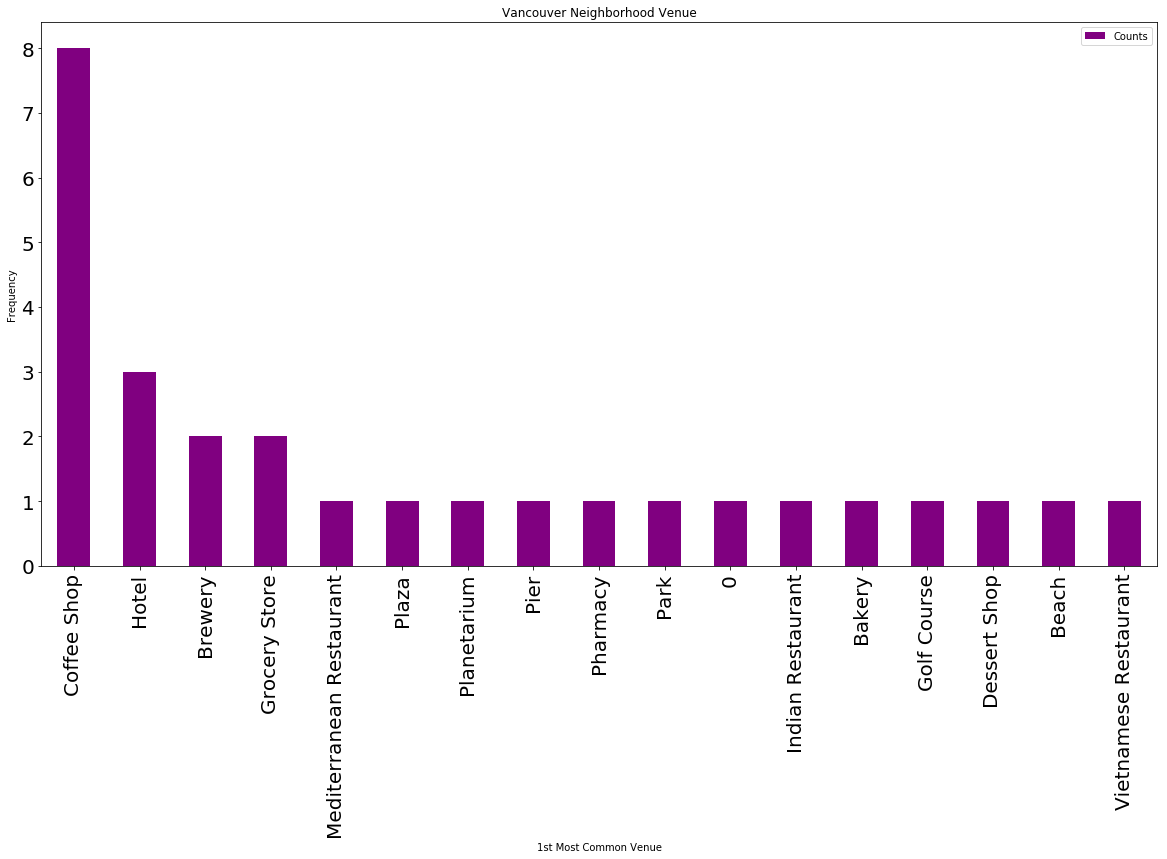

In [160]:
#Plotting the most common venues of Vancouver on a bar chart
vancouver_sorted.plot(kind='bar',figsize = (20,10), fontsize = 20, color='purple')
plt.ylabel('Frequency')
plt.title('Vancouver Neighborhood Venue')
plt.show()

In [162]:
#Getting the neighborhoods for the top 4 most common venues
list_top_venues = ['Coffee Shop','Hotel','Brewery', 'Grocery Store']
print('-------------------------------------------------------')
for venue in list_top_venues:
    print('The nearest neighborhood to the ' + venue + ' is : ')
    locator = vancouver_new_df.loc[vancouver_new_df['1st Most Common Venue'] == venue]
    print(locator['Neighborhood'].values)
    print('---------------------------------------------------')

-------------------------------------------------------
The nearest neighborhood to the Coffee Shop is : 
['Waterfront' 'Harbour Centre' 'Stanley Park' 'South Shaughnessy'
 'West Vancouver Southeast' 'West Fairview' 'West Vancouver South'
 'East Fairview']
---------------------------------------------------
The nearest neighborhood to the Hotel is : 
['Pacific Centre' 'SW Downtown' 'South West End']
---------------------------------------------------
The nearest neighborhood to the Brewery is : 
['Woodlands' 'West Mount Pleasant']
---------------------------------------------------
The nearest neighborhood to the Grocery Store is : 
['West Kensington' 'North Vancouver Southwest']
---------------------------------------------------


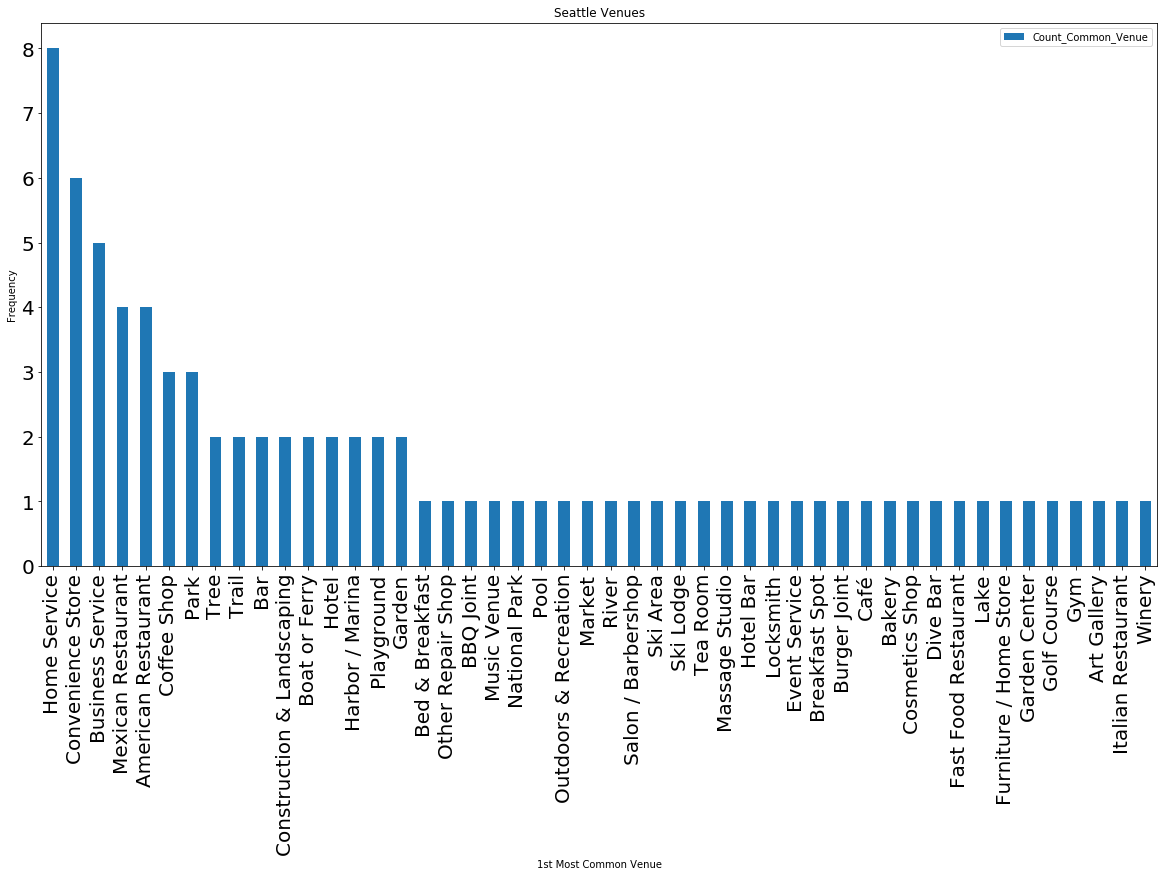

In [163]:
#Plotting the most common venues of Seattle on a bar chart
seattle_sorted.plot(kind='bar', figsize = (20,10), fontsize = 20)
plt.ylabel('Frequency')
plt.title('Seattle Venues')
plt.show()

In [165]:
#Getting the neighborhoods of Seattle for the top 4 most common venues
list_top_venues = ['Home Service','Convenience Service','Business Service', 'Mexican Restaurant']
print('-------------------------------------------------------')
for venue in list_top_venues:
    print('The nearest neighborhood to the ' + venue + ' is : ')
    locator = seattle_new.loc[seattle_new['1st Most Common Venue'] == venue]
    print(locator['Borough'].values)
    print('---------------------------------------------------')

-------------------------------------------------------
The nearest neighborhood to the Home Service is : 
['Bow' 'Bremerton' 'Duvall' 'Hobart' 'Kenmore' 'Lake Stevens' 'Langley'
 'Lynden']
---------------------------------------------------
The nearest neighborhood to the Convenience Service is : 
[]
---------------------------------------------------
The nearest neighborhood to the Business Service is : 
['Aberdeen' 'Black Diamond' 'Coupeville' 'Granite Falls' 'Woodinville']
---------------------------------------------------
The nearest neighborhood to the Mexican Restaurant is : 
['Lynnwood' 'Marysville' 'Shelton' 'Yakima']
---------------------------------------------------
